In [1]:
%matplotlib notebook
#%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime, timedelta

In [38]:
file_name = "data1_1.dat"

data = pd.read_csv(file_name, delimiter='\t', header=None)

# Preview the data
print(data.head())

              0         1         2         3         4         5
0  3.817014e+09  0.455087 -0.097675 -0.562498 -0.989632  1.060613
1  3.817014e+09  0.442524 -0.085112 -0.534860 -0.956969  1.020412
2  3.817014e+09  0.389761 -0.115263 -0.544910 -0.951944  0.927448
3  3.817014e+09  0.261620 -0.208227 -0.610236 -0.997170  0.766644
4  3.817014e+09  0.115892 -0.321292 -0.698176 -1.065009  0.573177


In [39]:
data.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
dtype: object

In [40]:
data.columns = ['timestamp', 'AIN0', 'AIN1', 'AIN2', 'AIN3', 'AIN4']
print(data.head())

      timestamp      AIN0      AIN1      AIN2      AIN3      AIN4
0  3.817014e+09  0.455087 -0.097675 -0.562498 -0.989632  1.060613
1  3.817014e+09  0.442524 -0.085112 -0.534860 -0.956969  1.020412
2  3.817014e+09  0.389761 -0.115263 -0.544910 -0.951944  0.927448
3  3.817014e+09  0.261620 -0.208227 -0.610236 -0.997170  0.766644
4  3.817014e+09  0.115892 -0.321292 -0.698176 -1.065009  0.573177


In [41]:
#Delete Columns if needed

# Drop columns AIN1 to AIN4 
# inplace = True permanently deletes these
# data.drop(columns=['AIN0', 'AIN1', 'AIN2', 'AIN3'], inplace=True)

# OR keep specific columns

# List of columns to keep
columns_to_keep = ['timestamp', 'AIN3', 'AIN4']

# Select only the desired columns
data = data[columns_to_keep]

print(data.head())





      timestamp      AIN3      AIN4
0  3.817014e+09 -0.989632  1.060613
1  3.817014e+09 -0.956969  1.020412
2  3.817014e+09 -0.951944  0.927448
3  3.817014e+09 -0.997170  0.766644
4  3.817014e+09 -1.065009  0.573177


Deal with the time stamp.
1. Convert to date time
2. Extract seconds and milliseconds
3. Add a seconds and milli seconds to another column

In [42]:
# Define the epoch (January 1, 1904)
epoch = datetime(1904, 1, 1)

# Apply the conversion to the 'timestamp' column
data['datetime'] = data['timestamp'].apply(lambda x: epoch + timedelta(seconds=x))


In [43]:
# Ensure 'datetime' column is sorted (if not already sorted)
data = data.sort_values(by='datetime')

# Extract the first and last datetime
start_time = data['datetime'].iloc[0]
end_time = data['datetime'].iloc[-1]

# Calculate the duration
duration = end_time - start_time  # This is a timedelta object

# Convert duration to minutes and seconds
duration_minutes = duration.total_seconds() // 60  # Whole minutes
duration_seconds = duration.total_seconds() % 60   # Remaining seconds

In [44]:
testSeconds = duration.total_seconds()
testPoints = len(data)
milliTick = testSeconds/testPoints
milliTick = round(milliTick, 4)
milliTick = milliTick * 1000

In [45]:
# Print the results
print(f"Start Time: {start_time}")
print(f"End Time: {end_time}")
print(f"Duration: {int(duration_minutes)} minutes and {int(duration_seconds)} seconds")
print(f"Number of samples taken: {testPoints}")
print(f"Sampling rate: {milliTick} ms")

Start Time: 2024-12-14 09:35:50.290000
End Time: 2024-12-14 09:37:03.519000
Duration: 1 minutes and 13 seconds
Number of samples taken: 3660
Sampling rate: 20.0 ms


In [46]:
# Generate a sequence of increments (0, 0.02, 0.04, ...)
increments = np.arange(0, milliTick * len(data), milliTick)

# Add as a new column to the DataFrame
data['milliTick'] = increments


<IPython.core.display.Javascript object>


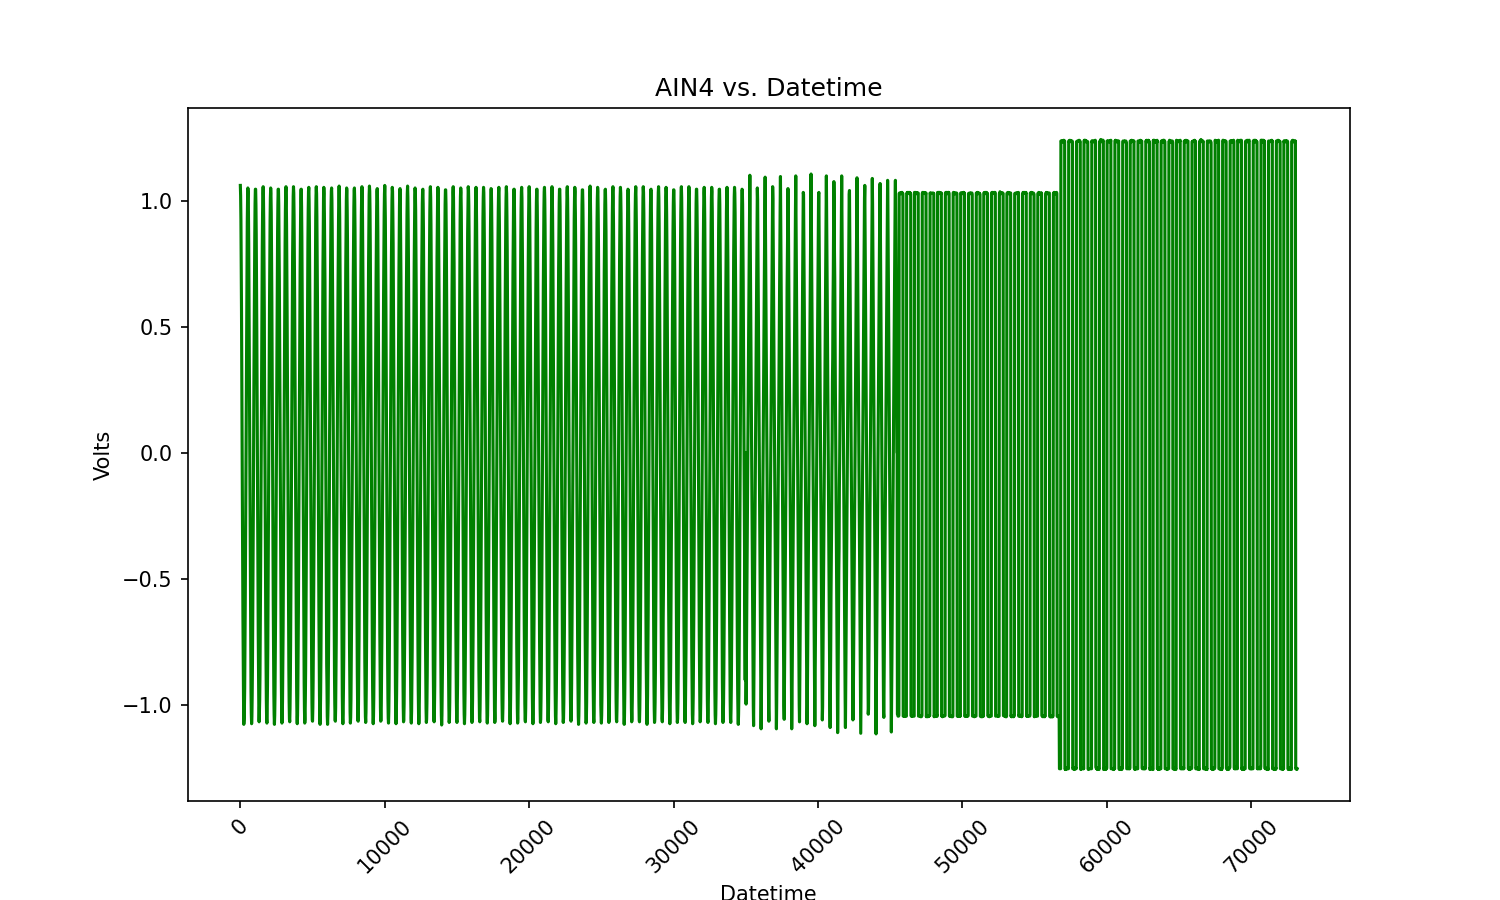

In [47]:
#subset_data = data.head(10)

#plt.plot(subset_data['testseconds'], subset_data['AIN4'], color='green')
plt.figure(figsize=(10,6))
plt.plot(data['milliTick'], data['AIN4'], color='green')
plt.xlabel('Datetime')
plt.ylabel('Volts')
plt.title('AIN4 vs. Datetime')
plt.xticks(rotation=45)
plt.show()


<IPython.core.display.Javascript object>


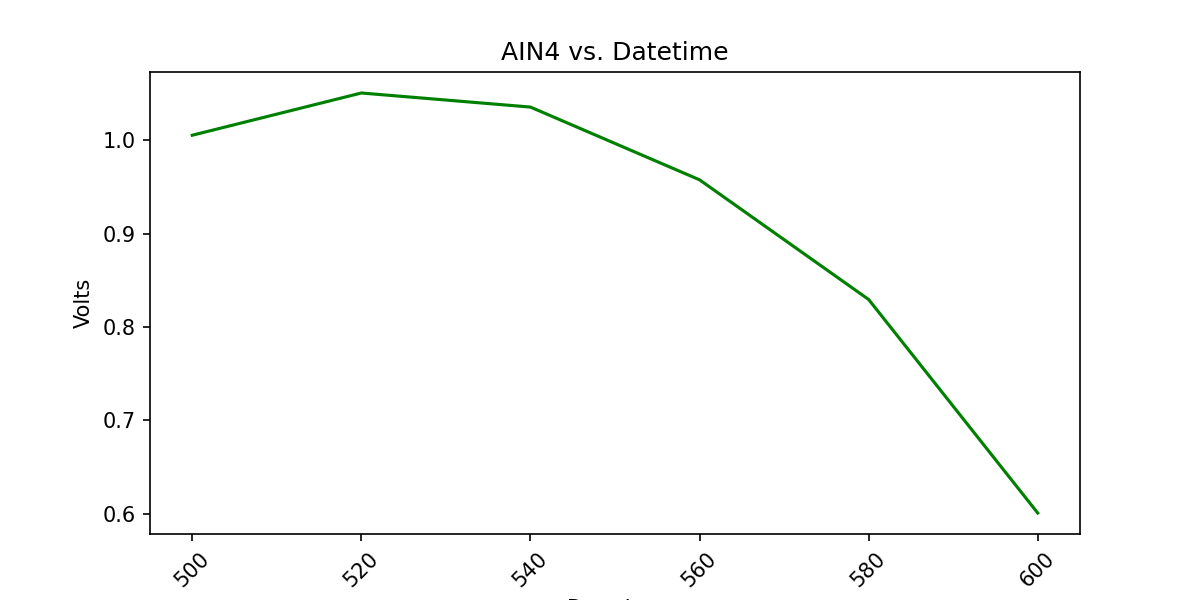

In [59]:
msStart = 500
msStop = 600
parsed_data = data[(data['milliTick'] >= msStart) & (data['milliTick'] <= msStop)]

plt.figure(figsize=(8,4))
plt.plot(parsed_data['milliTick'], parsed_data['AIN4'], color='green')
plt.xlabel('Datetime')
plt.ylabel('Volts')
plt.title('AIN4 vs. Datetime')
plt.xticks(rotation=45)
plt.show()

In [62]:
#Find frequency (if periodic)
# Find where the sign changes between consecutive values
sign_changes = (parsed_data['AIN4'].shift(1) > 0) & (parsed_data['AIN4'] < 0) | (parsed_data['AIN4'].shift(1) < 0) & (parsed_data['AIN4'] > 0)

# Count the number of zero crossings
zero_crossings = sign_changes.sum()

# Print the result
print(f"{zero_crossings} zero crossings over {sTotal} seconds")

sTotal = (msStop - msStart)/1000
zero_crossings = zero_crossings - 1
cycles = zero_crossings / 2

freq = cycles / sTotal
freq = round(freq, 2)
if freq < 0:
        freq = 0

print(f"Frequency: {freq} Hz")

0 zero crossings over 0.1 seconds
Frequency: 0 Hz
